# **Tasks**

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. More info about this dataset can be found here - [URL](https://archive-beta.ics.uci.edu/ml/datasets/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

Download the dataset from here - [Download Link](https://drive.google.com/file/d/1QnIf-e7bCKBaKRfCPHmKwqcyiuoA_HD4/view?usp=sharing)


Now try to do the following:

1. First find the number of optimal clusters using the elbow method
1. Apply k-means clusturing. Try different configurations to see what you get.
2. Apply aggolomerative clusturing method. Try different criteria of distance and do a comparative analysis on them.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading the dataset**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ObesityDataSet_raw_and_data_sinthetic.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 2111 rows and 17 columns.


## **Preprocess data**


We can see that the columns "state", "international plan", "voice mail plan" and "churn" have String values. The latter three seem to have just the values "yes" or "no" and are therefore converted to 1 and 0 respectively.

The "state" column is converted using the LabelEncoder, which replaces each unique label with a unique integer. In this case, a label encode is used instead of dummy variables because of the many distinct values, which when converted into dummy variables would mess up the for example the PCA and the feature importance of the tree-based models.

The "phone number" column is removed, because every customer has its own phone number.


# **Issues in clustering**

In [13]:

    #Dropping unnecessary attribute
    df.drop(["NObeyesdad"], axis=1)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


# **Selecting Data for clustering analysis**

In [16]:
X = df.iloc[:, [1, 2]].values

# **Issues in clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

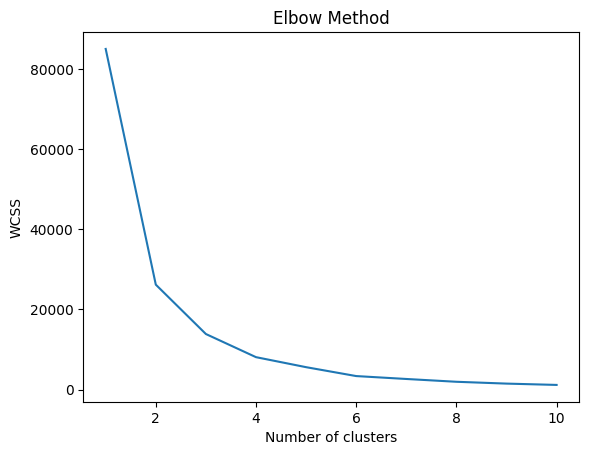

In [17]:
from sklearn.cluster import KMeans
# (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Hierarchical Clustering Methods**

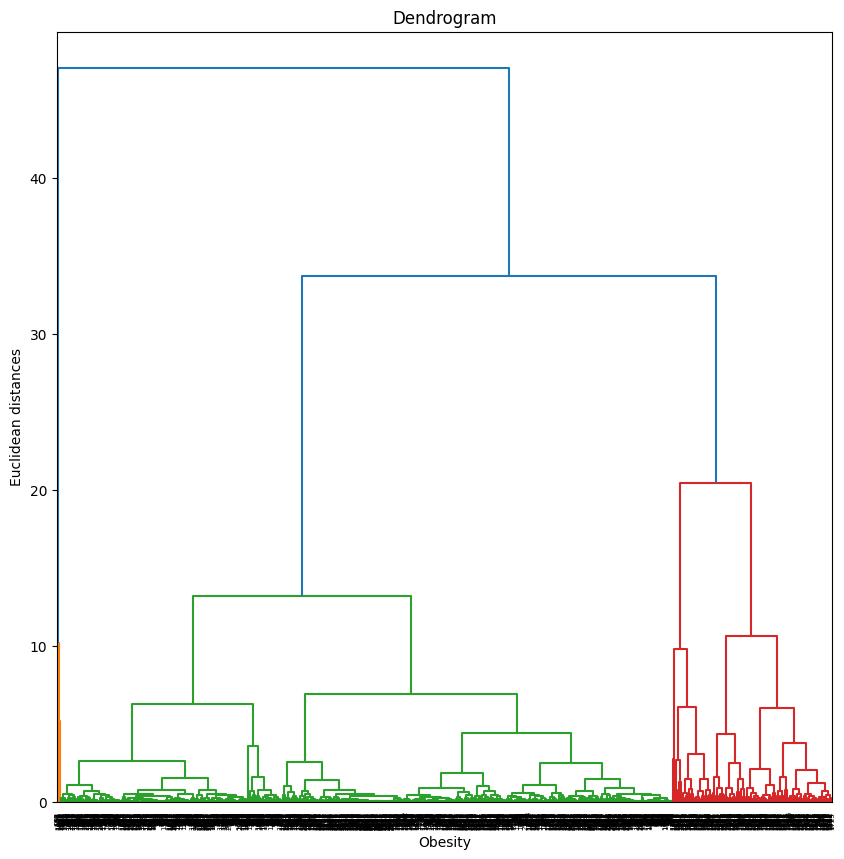

In [18]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Obesity')
plt.ylabel('Euclidean distances')
plt.show()

## **Single linkage**

Single linkage, sometimes termed the nearest-neighbor approach, is based on
the minimum distance between any record in cluster A and any record in cluster
B. In other words, cluster similarity is based on the similarity of the most
similar members from each cluster.
Single linkage tends to form long, slender clusters, which may sometimes lead
to heterogeneous records being clustered together.

In [39]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


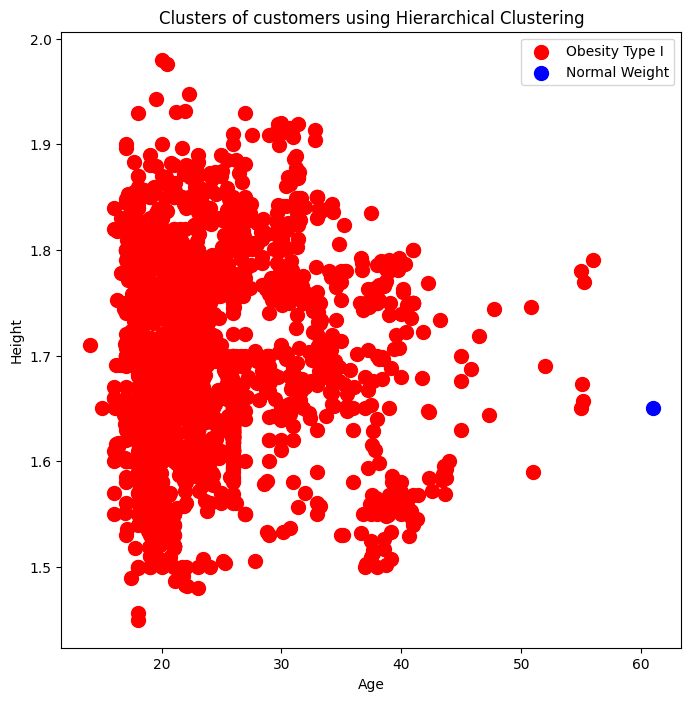

In [40]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Obesity Type I')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Normal Weight')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

## **Complete linkage**

Complete linkage, sometimes termed the farthest-neighbor approach, is based
on the maximum distance between any record in cluster A and any record in
cluster B.In other words, cluster similarity is based on the similarity of the
most dissimilar members from each cluster.
Complete-linkage tends to form more compact, sphere-like clusters, with all
records in a cluster within a given diameter of all other records.

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


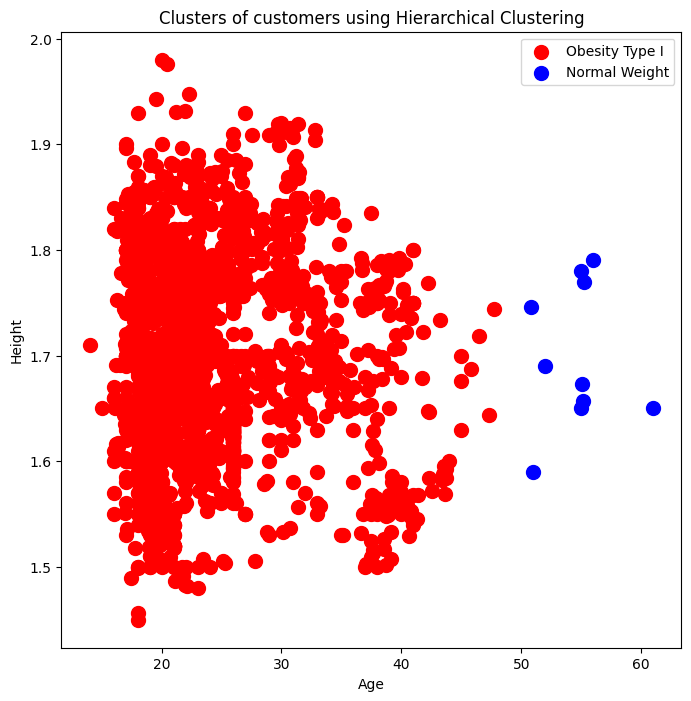

In [42]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Obesity Type I')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Normal Weight')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

## **Average linkage**

Average linkage is designed to reduce the dependence of the cluster-linkage criterion on extreme values, such as the most similar or dissimilar records. In
average linkage, the criterion is the average distance of all the records in
cluster A from all the records in cluster B.
The resulting clusters tend to have approximately equal within-cluster variability.

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


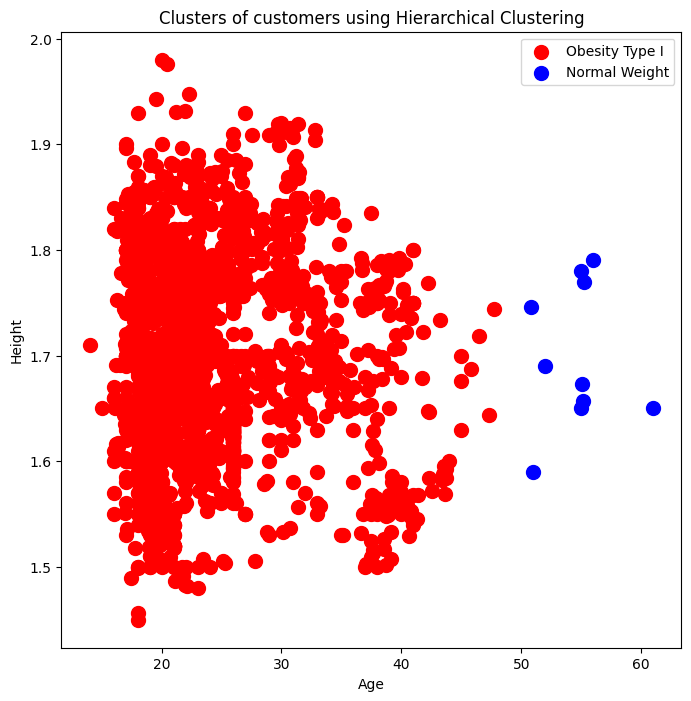

In [44]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Obesity Type I')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Normal Weight')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

## **Ward linkage**

Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster. Ward´s Method seeks to choose the successive clustering steps so as to minimize the increase in ESS at each step.



In [45]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


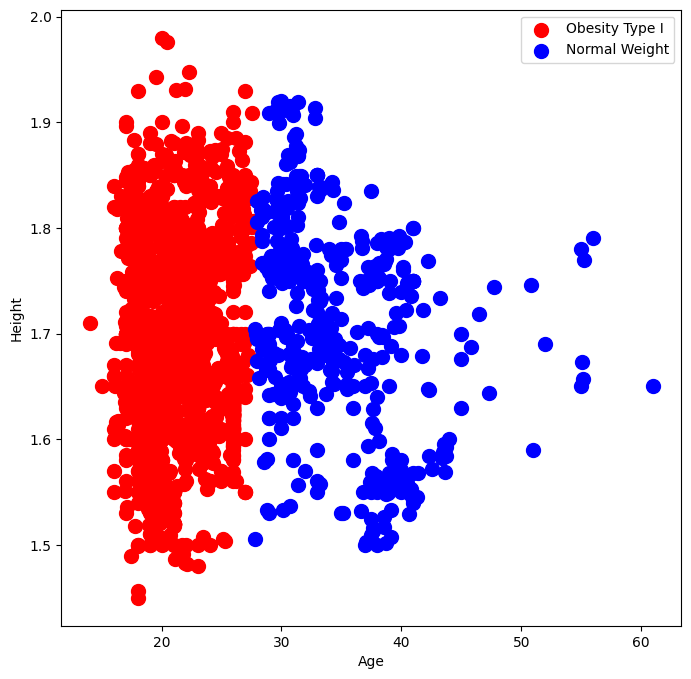

In [46]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Obesity Type I')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Normal Weight')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()

# **k-means Clustering**

In [37]:
kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


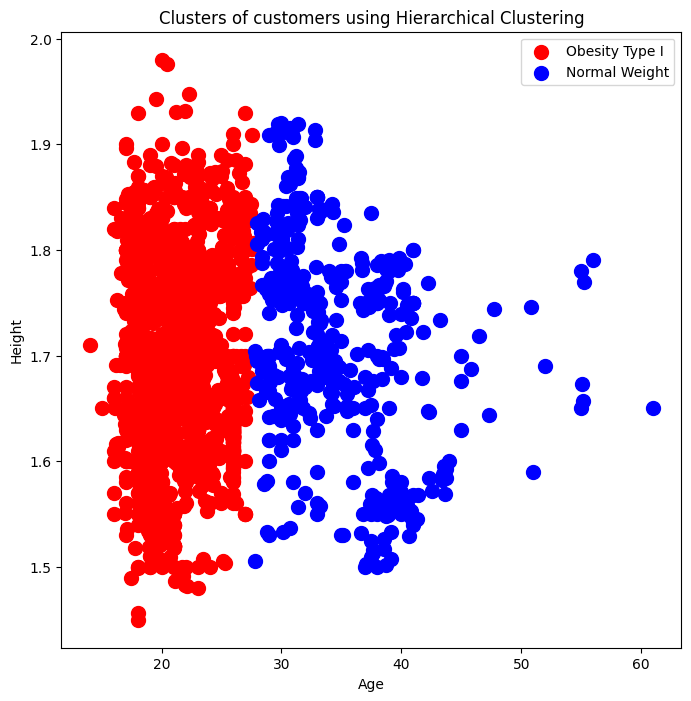

In [47]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Obesity Type I')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Normal Weight')

plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Height')
plt.legend()
plt.show()